### $1.$ Graficar como convergen 4 condiciones iniciales a las raiz real de $x^3−x^2−x−1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_{k}$, luego grafiquen el error relativo a la raiz, es decir $(x_{k}−S)/S$, donde $S$ es la raíz. 

In [86]:
using PyPlot
function Metodo_Newton(x0, f::Function, df::Function) #Comenzamos definiendo nuestra funcion y lo que esta va hacer
    S=1.8392867552141612
    N=100
    arreglo = []
    xarreglo = []
    Error=0.0001
    Error_arreglo= []
    for i in 1:N
    
        x0= x0-(f(x0)/df(x0))
   
        push!(arreglo,x0)
        
        push!(xarreglo,f(x0))
        
        Error=(arreglo-S)/S
        push!(Error_arreglo,Error)
        
    
    end

    xlabel("x")
    ylabel("y")
    title("Convergencia del método de Newton")
     
    PyPlot.xlabel("x")
    
    PyPlot.grid()
    
    PyPlot.scatter(arreglo,xarreglo,color = "orange",label = "error")
    scatter(arreglo,xarreglo,color="green", label="iter")
     scatter(arreglo,Error, color="red")    
    show()
    
    
end

Metodo_Newton (generic function with 1 method)

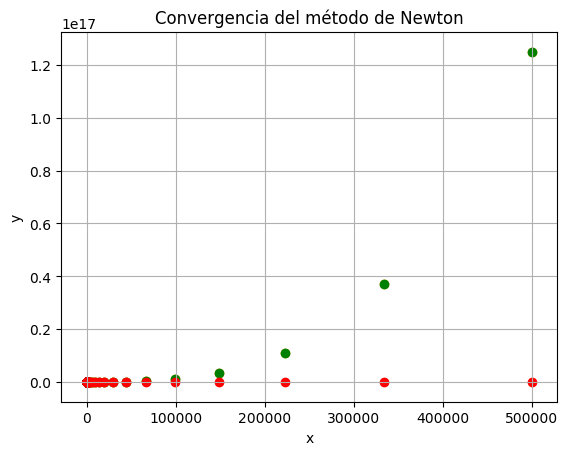

In [87]:
Metodo_Newton(1.000001, x->(x^3)-(x^2)-x-1, x->3*(x^2)-2*x-1)

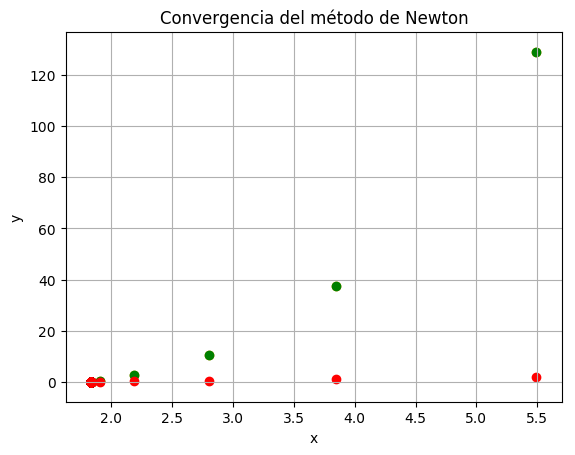

In [80]:
Metodo_Newton(8, x->(x^3)-(x^2)-x-1, x->3*(x^2)-2*x-1)

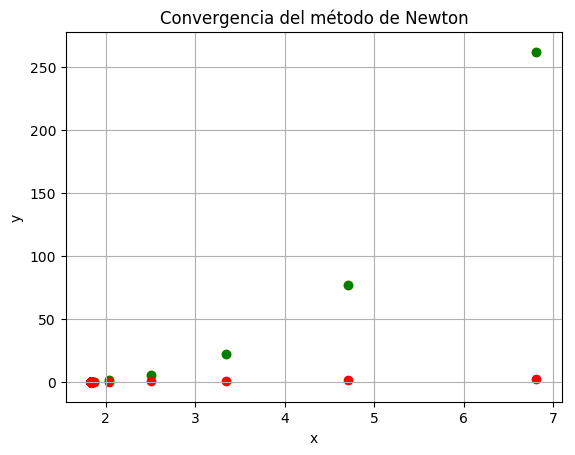

In [81]:
Metodo_Newton(10, x->(x^3)-(x^2)-x-1, x->3*(x^2)-2*x-1)

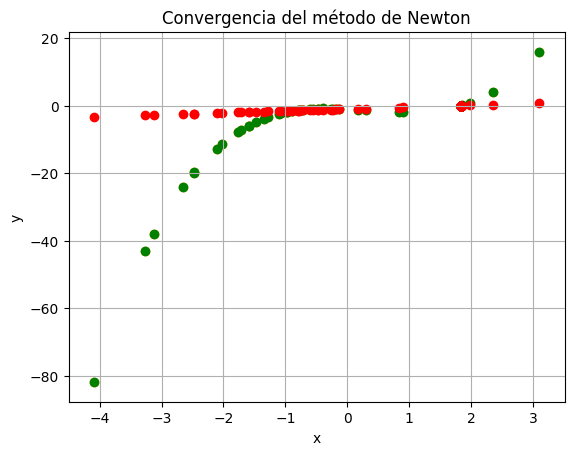

In [82]:
Metodo_Newton(-5, x->(x^3)-(x^2)-x-1, x->3*(x^2)-2*x-1)

In [90]:
function biseccion(a,b)
    p = (a+b)/2
    array=[]
    array2=[]
    arrayer=[]
    S=1.8392867552141619
    f(x) = (x^3)-(x^2)-x-1 
    for i in 1:50
        if  f(a)*f(p) > 0
            a = p
            
        end
        
        if f(b)*f(p) > 0
            b = p
            
            
        end
        p = (a+b)/2
        push!(array,p)
        
    end
    
    error=(array-S)/S
    push!(arrayer,error)
    
    xlabel("x")
    ylabel("y")
    title("Metodo de biseccion")
    plot(array,label="p")
    plot(error,label="error")
    PyPlot.grid()
    
    return p
    
end;

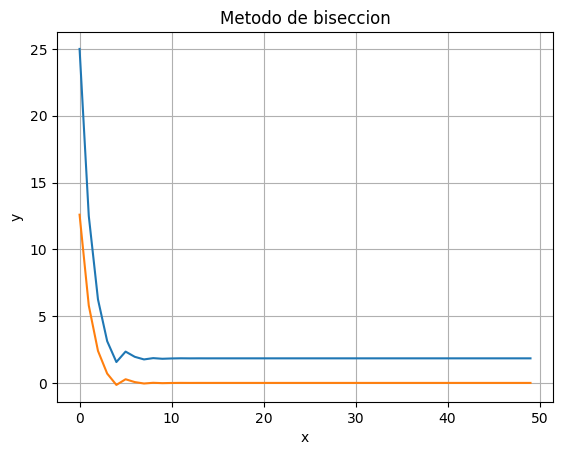

1.83928675521412

In [91]:
biseccion(0,100)

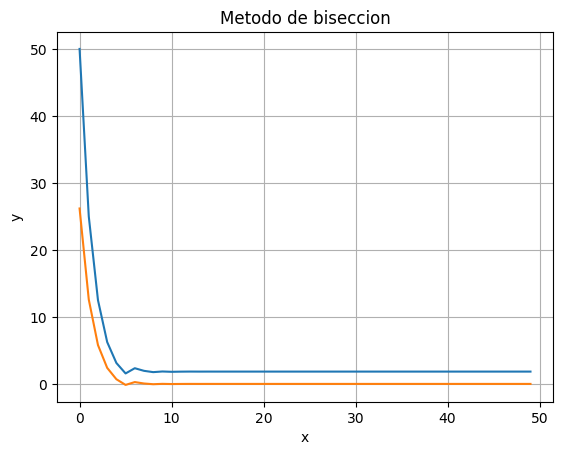

1.8392867552141645

In [93]:
biseccion(0,200)

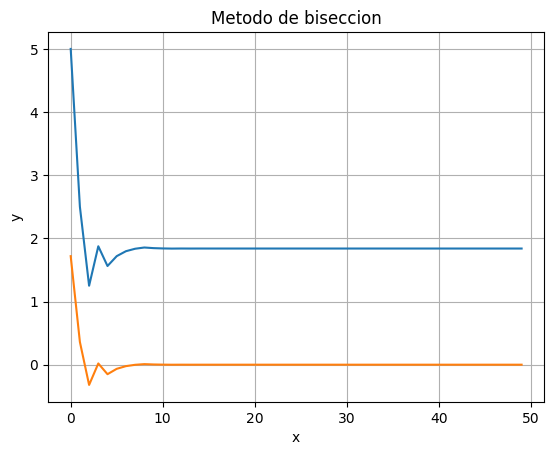

1.8392867552141556

In [94]:
biseccion(0,20)

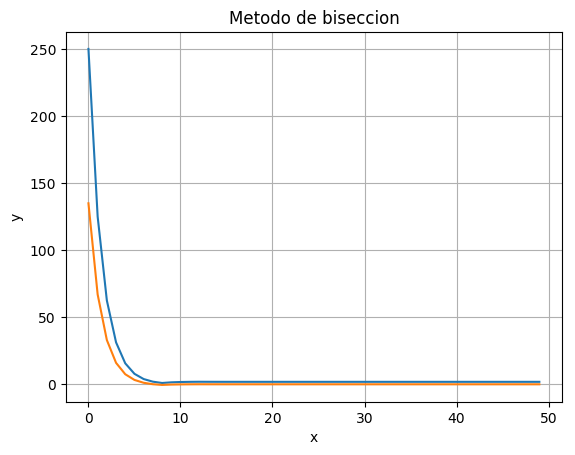

1.8392867552141645

In [95]:
biseccion(0,1000)

### $2.$ Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones :
$*$ Que tome como argumentos tanto a la función, su derivada y la condición inicial. Es decir, el input debe ser metodo_newton(f,df,x0). El output debe ser alguna raíz.

In [96]:
function Metodo_Newton2(x0, f::Function, df::Function) #Comenzamos definiendo nuestra funcion y lo que esta va hacer
   
    N=200
    
    for i in 1:N
    
        x0= x0-(f(x0)/df(x0))
   
    end
  
    return x0
end

Metodo_Newton2 (generic function with 1 method)

In [97]:
Metodo_Newton2(1.000001, x->(x^3)-(x^2)-x-1, x->3*(x^2)-2*x-1)

1.8392867552141612

In [98]:
Metodo_Newton2(1.000001, x->x^2, x->2*x)

6.223021500876419e-61

In [99]:
# ahora le daremos un intervalo para que la funcion evalue todos las iteraciones de las raices
function Metodo_Newton3(seg,f::Function,df::Function)

    list=zeros(length(seg))
    x0=0
    for i in 1:length(seg)
    
        x0=seg[i]
       
        x0=Metodo_Newton2(x0,f,df) 
    
        list[i]=x0
   
    end
    
  return list
    
end


Metodo_Newton3 (generic function with 1 method)

In [104]:
Metodo_Newton3.(linspace(-100.,100.,200),x->(x^3)-(x^2)-x-1, x->3*(x^2)-2*x-1)
#length(x0)

200-element Array{Array{Float64,1},1}:
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 ⋮        
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]
 [1.83929]

### Crear la misma rutina, pero que esta vez solo reciba intervalos y que revise el arreglo despues de 200 iteraciones y solo tome las raices diferentes hasta cierto ϵ.

In [113]:
# en esta parte vamos a colocar en nuestro arreglo solo las raices no repetidas

function Metodo_Newton4(seg,f::Function,df::Function)
    
    
    t=[]
    S=f(seg)
    x0=3
    tol=0.0001
    diferencia=1
    error=abs(S) 
        
    
        while error>tol && diferencia>0.001 
        
    
        a=f(x0) 
        b=df(x0) 
        x1=x0-(a/b) 
        error=abs(f(x1)) 
        diferencia=abs(x1-x0)
        x0=x1 
   
    
    end
    
    
push!(t,x0)
end
    
    
    
    
    
    
    
    
 


Metodo_Newton4 (generic function with 1 method)

In [114]:

Metodo_Newton4.(linspace(-100.,100.,200),x->(x^3)-(x^2)-x-1, x->3*(x^2)-2*x-1)


LoadError: [91msyntax: incomplete: premature end of input[39m

5-element Array{Float64,1}:
 0.142311 
 0.550529 
 0.508822 
 0.311873 
 0.0632303

### (Lean bien este paso!) Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los inputs de la función del método sean solamente la función y la condición inicial.

In [55]:
using SymPy
A,x,a,n,m=symbols("A,x,a,n,m") # Definimos los simbolos que se van a ocupar
tol=0.00001

function Newton_ultimate(f::Function,x0)
    df = simplify(diff(f),[x])
    d = lambdify(df,[x])
    eps=200
    
     
    
    for i in 1:eps
    
        x0= x0-(f(x0)/d(x0))
   
    end
  
    return x0
  
    
     
    
end



Newton_ultimate (generic function with 1 method)

In [57]:
Newton_ultimate.(x->(x^3)-(x^2)-x-1, 3) #probamos nuestra ultima funcion

1.8392867552141612